## Enfermedades Coralinas

Rodrigo Fritz

| Tasa de crecimiento del coral | Tasa de avance lineal de lunares obscuros | Incidencia | Promedio de lunares obscuros por nódulo enfermo | Recuperación |
| :-: | :-: | :-: | :-: | :-: |
| 0.86 ± 0.04 cm/año | 1.77 ± 1.8 cm/año | 37.8% anual | 3.08 ± 4 lunares/nódulo | 6.5% promedio |

$ $

| Tamaño promedio de los nódulos (en área superficial proyectada) | Tamaño promedio de los lunares obscuros (en área superficial proyectada) |
| :-: | :-: |
| 66.5 ± 10.7 cm$^2$ | 6 ± 5.4 cm$^2$ |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

# For the progress bar:
import time
from tqdm.notebook import tqdm

La simulación con autómatas celulares, i.e. el modelo basado en agentes, genera una imagen para cada paso de la evolución, cada una de las cuales será guardada en un .gif

Hay 4 estados para cada pixel de la malla cuadrada que represanta a un agente:

- Estado 0 (azul):     espació vacío
- Estado 1 (verde):    coral en crecimiento
- Estado 2 (amarillo): lunar oscuro creciendo sobre el coral
- Estado 3 (rojo):     muerte del coral debida al lunar

In [22]:
def count_neighbours(grid, row, col):
    count = 0
    for (x,y) in (
            (row - 1, col), (row + 1, col), (row, col - 1),
            (row, col + 1), (row - 1, col - 1), (row - 1, col + 1),
            (row + 1, col - 1), (row + 1, col + 1)
            ):
        if not (0 <= x < len(grid) and 0 <= y < len(grid[x])):
            # out of bounds
            continue
        if grid[x][y] == 1:
            count += 1
    return count

In [220]:
grid = np.zeros([6,6])
grid

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [223]:
rows = grid.shape[0]
cols = grid.shape[1]
grid[np.random.randint(rows),np.random.randint(cols)] = 1
grid

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [218]:
rows = grid.shape[0]
cols = grid.shape[1]
for i in range(rows):
    for j in range(cols):
        n = count_neighbours(grid, i, j)
        if n > 2:
            grid[i,j] = 1
grid

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [495]:
def coral(df, side): # df = data frame, side = tamaño del lado del cuadrado: np.sqrt(len(sts)).astype(int)
    
    states = []
    sts = np.array(df["state"])
    
    #Vecindad de Moore
    for j in range(0, len(sts) - 2*side-2, 3*side):
        for i in range(1, side-1, 3):
            grid = np.array([[sts[i-1 + j],        sts[i + j],        sts[i+1 + j]],
                             [sts[i+side-1 + j],   sts[i+side + j],   sts[i+side+1 + j]],
                             [sts[i+2*side-1 + j], sts[i+2*side + j], sts[i+2*side+1 + j]]])
#             print(grid)
        
            for i in range(3):
                for j in range(3):
                    n = count_neighbours(grid, i, j)
                    if(grid[i,j]==0 and n>1): #si hay espacio vacío (edo 0), con tasa de crecimiento 2/8 vecinos = 0.25,
                                              #crece el coral (edo 1)            
                        grid[i-1,j-1] = 1
                        grid[i-1,j] = 1
                        grid[i-1,j+1] = 1
                        grid[i,j-1] = 1
                        grid[i,j] = 1 
                        grid[i,j+1] = 1
                        grid[i+1,j-1] = 1
                        grid[i+1,j] = 1
                        grid[i+1,j+1] = 1
            #Update agents
            agents_i = grid.flatten()
            states = np.append(states, agents_i).astype(int)
        
    data = {"state": states}
    sts = pd.DataFrame(data)
        
    return sts

In [482]:
coral(agents,42)

,state
0,0
1,0
2,0
3,0
4,0
...,...
1759,0
1760,0
1761,0
1762,0


In [412]:
i = 61
grid_i = np.array([[df[i-1], df[i], df[i+1]],
                   [df[i+side-1], df[i+side], df[i+side+1]],
                   [df[i+2*side-1], df[i+2*side], df[i+2*side+1]]])
grid_i

array([[0., 0., 3.],
       [0., 0., 1.],
       [0., 1., 2.]])

In [419]:
side = 9
for j in range(0, len(df) - 2*side-2, 3*side):
    for i in range(1, side-1, 3):
        grid1 = np.array([[df[i-1 + j],        df[i + j],        df[i+1 + j]],
                          [df[i+side-1 + j],   df[i+side + j],   df[i+side+1 + j]],
                          [df[i+2*side-1 + j], df[i+2*side + j], df[i+2*side+1 + j]]])
        print(i,j)
        print(grid1)

1 0
[[3. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
4 0
[[0. 0. 0.]
 [0. 0. 0.]
 [3. 0. 1.]]
7 0
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
1 27
[[0. 2. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
4 27
[[0. 0. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]
7 27
[[0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 2.]]
1 54
[[0. 0. 0.]
 [3. 0. 0.]
 [0. 0. 0.]]
4 54
[[0. 0. 2.]
 [0. 1. 3.]
 [0. 0. 0.]]
7 54
[[0. 0. 3.]
 [0. 0. 1.]
 [0. 1. 2.]]


In [265]:
coral(sts,45)[coral(sts,45)["state"]==3]

,state
520,3
944,3
991,3
995,3
1031,3


In [353]:
i = 1597
np.array([[sts[i-1], sts[i], sts[i+1]],
          [sts[i+side-1], sts[i+side], sts[i+side+1]],
          [sts[i+2*side-1], sts[i+2*side], sts[i+2*side+1]]])

array([[2, 1, 3],
       [0, 0, 1],
       [0, 0, 1]])

In [151]:
#Para cambiar cuadros de 9 celdas en un mismo estado, a otro estado
def restriction(df,i,side,s1,s2,s3):
    if all([
        df.iloc[i+1]["state"] != s2 or s3,
        df.iloc[i  ]["state"] != s2 or s3,
        df.iloc[i-1]["state"] != s2 or s3,
        df.iloc[i+side-1]["state"] != s2 or s3,
        df.iloc[i+side  ]["state"] != s2 or s3,
        df.iloc[i+side+1]["state"] != s2 or s3,
        df.iloc[i-side-1]["state"] != s2 or s3,
        df.iloc[i-side  ]["state"] != s2 or s3,
        df.iloc[i-side+1]["state"] != s2 or s3
        ]):
            df.iloc[i+1]["state"] = s1        #se expanden con tasa de crecimiento beta
            df.iloc[i  ]["state"] = s1
            df.iloc[i-1]["state"] = s1
            df.iloc[i+side-1]["state"] = s1
            df.iloc[i+side  ]["state"] = s1
            df.iloc[i+side+1]["state"] = s1
            df.iloc[i-side-1]["state"] = s1
            df.iloc[i-side  ]["state"] = s1
            df.iloc[i-side+1]["state"] = s1

In [158]:
restriction(agents,1,42,1,2,3)

Estoy usando este coral:

In [162]:
def coral(df, side, β=0.5): # df = data frame, β = tasa de crecimiento
    for i in range(len(df) - 2*side-2):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<=β): #Las semillas de corales (estado 1)
            restriction(df,i,side,1,2,3)

Estas 2 funionan

In [134]:
def coral(df, side, β=0.5): # df = data frame, β = tasa de crecimiento
    for i in range(len(df) - 2*side-2):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<=β): #Las semillas de corales (estado 1)
            df.iloc[i+1]["state"] = 1        #se expanden con tasa de crecimiento beta
            df.iloc[i-1]["state"] = 1        #en una vecindad de Moore
            df.iloc[i+side-1]["state"] = 1
            df.iloc[i+side  ]["state"] = 1
            df.iloc[i+side+1]["state"] = 1
            df.iloc[i-side-1]["state"] = 1
            df.iloc[i-side  ]["state"] = 1 
            df.iloc[i-side+1]["state"] = 1

In [119]:
#No funcionó
def coral(df, side, β=0.5): # df = data frame, β = tasa de crecimiento
    for i in range(len(df)):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<=β): #Las semillas de corales (estado 1) se expanden con tasa de crecimiento beta
            Moore1(df,i,side,0,1)

Crecimiento de lunar restringido, sin el centro:

In [76]:
def lunar(df, side, σ=1/4): #df = data frame, σ = periodo de incubación de 4 días para covid
    for i in range(len(sts) - 2*side-2): #range(len(df)-1):
#         p = np.random.uniform(0,1) #random float between 0 and 1
#         if(df.iloc[i]["state"]==1 and df.iloc[i+1]["state"]==0 and df.iloc[i-1]["state"]==0 and p<=σ):
            #Los corales (estado 1) se infectan en
#             df.iloc[i+1]["state"]=2 #lunares (estado 2) con tasa de infección σ
#             df.iloc[i-1]["state"]=2
        if(df.iloc[i-1]["state"] == 1 and
           df.iloc[i  ]["state"] == 1 and 
           df.iloc[i+1]["state"] == 1 and 
           df.iloc[i+side-1]["state"] == 1 and 
           df.iloc[i+side  ]["state"] == 1 and 
           df.iloc[i+side+1]["state"] == 1 and 
           df.iloc[i+2*side-1]["state"] == 1 and 
           df.iloc[i+2*side  ]["state"] == 1 and 
           df.iloc[i+2*side+1]["state"] == 1):
            df.iloc[i]["state"] = 2

In [111]:
#Para cambiar cuadros de 9 celdas en un mismo estado, a otro estado
def Moore(df,i,side,s1,s2):
    if all([
        df.iloc[i+1]["state"] == s1,
        df.iloc[i  ]["state"] == s1,
        df.iloc[i-1]["state"] == s1,
        df.iloc[i+side-1]["state"] == s1,
        df.iloc[i+side  ]["state"] == s1,
        df.iloc[i+side+1]["state"] == s1,
        df.iloc[i-side-1]["state"] == s1,
        df.iloc[i-side  ]["state"] == s1,
        df.iloc[i-side+1]["state"] == s1
        ]):
            df.iloc[i+1]["state"] = s2        #se expanden con tasa de crecimiento beta
            df.iloc[i  ]["state"] = s2
            df.iloc[i-1]["state"] = s2
            df.iloc[i+side-1]["state"] = s2
            df.iloc[i+side  ]["state"] = s2
            df.iloc[i+side+1]["state"] = s2
            df.iloc[i-side-1]["state"] = s2
            df.iloc[i-side  ]["state"] = s2
            df.iloc[i-side+1]["state"] = s2

In [118]:
#Para cambiar cuadros de 9 celdas en un mismo estado, a otro estado
def Moore1(df,i,side,s1,s2):
    if df.iloc[i]["state"] == s1:
        df.iloc[i+1]["state"] = s2
        df.iloc[i  ]["state"] = s2
        df.iloc[i-1]["state"] = s2
        df.iloc[i+side-1]["state"] = s2
        df.iloc[i+side  ]["state"] = s2
        df.iloc[i+side+1]["state"] = s2
        df.iloc[i-side-1]["state"] = s2
        df.iloc[i-side  ]["state"] = s2
        df.iloc[i-side+1]["state"] = s2

In [209]:
Moore(agents,1,42,1,2)

In [211]:
agents[agents['state']==3]

,state
689,3
690,3
691,3
692,3
693,3
...,...
1716,3
1717,3
1718,3
1719,3


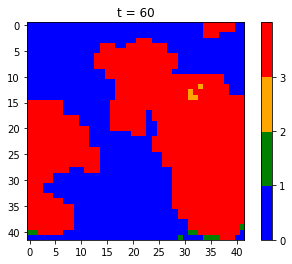

In [200]:
sts = np.array(agents["state"])
show_sts = np.reshape( sts, (side,side) )
img = plt.imshow(show_sts, cmap=cmap, norm=norm)
plt.colorbar(boundaries=bounds, ticks=[0,1,2,3])
plt.title("t = "+str(t))
plt.xticks(np.arange(0, side, 5))
plt.yticks(np.arange(0, side, 5))
plt.show()

In [169]:
def lunar(df, side, σ=1/4): #df = data frame, σ = tasa de avance lineal de los lunares obscuros
    for i in range(len(df) - 2*side-2):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<=σ): #Las semillas de corales (estado 1)
            df.iloc[i+1]["state"] = 2        #se expanden con tasa de crecimiento beta
            df.iloc[i  ]["state"] = 2
            df.iloc[i-1]["state"] = 2
            df.iloc[i+side-1]["state"] = 2
            df.iloc[i+side  ]["state"] = 2
            df.iloc[i+side+1]["state"] = 2
            df.iloc[i-side-1]["state"] = 2
            df.iloc[i-side  ]["state"] = 2
            df.iloc[i-side+1]["state"] = 2

Estoy usando este lunar:

In [171]:
def lunar(df, side, σ=1/4): #df = data frame, σ = tasa de avance lineal de los lunares obscuros
    for i in range(len(df) - 2*side-2):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<=σ): #Las semillas de corales (estado 1)
            restriction(df,i,side,2,0,1)

In [116]:
def lunar(df, side, σ=1/4): #df = data frame, σ = tasa de avance lineal de los lunares obscuros
    for i in range(len(df) - 2*side-2):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<=σ): #Las semillas de corales (estado 1) se expanden con tasa de crecimiento beta
            Moore(df,i,side,1,2)

In [167]:
def lunar(df, σ=0.5):
    for i in range(len(df)):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==1 and p<=σ): #Los corales (estado 1) se transforman en 
            df.iloc[i]["state"]=2            #Infectados (estado 2) con tasa de infección sigma

Estoy usando este removed:

In [137]:
def removed(df, γ=0.1): #γ = tasa de mortandad
    for i in range(len(df)):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==2 and p<=γ): #Los infectados se transforman en recuperados después de 1/gamma días
            df.iloc[i]["state"]=3

In [135]:
def removed(df, γ=0.1): #γ = tasa de mortandad
    for i in range(len(df)):
        p = np.random.uniform(0,1) #random float between 0 and 1
        if(df.iloc[i]["state"]==2 and p<=γ): #Los infectados se transforman en recuperados después de 1/gamma días
            Moore(df,i,side,2,3)

In [6]:
from PIL import Image
import matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay

In [7]:
save_folder = 'coral'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

### Coral

In [60]:
agents.iloc[[1,5,7]]["state"]

1    0
5    0
7    0
Name: state, dtype: int32

In [62]:
arr = []
for i in range(4):
    i0 = np.random.randint(0,nAgents)
    s0 = 1
    agents.iloc[i0]["state"] = s0
    arr.append(i0)
arr

[1072, 703, 1121, 1516]

In [230]:
data

{'state': array([0, 0, 0, ..., 0, 0, 0])}

In [293]:
sts

array([2, 1, 3, ..., 0, 0, 1])

In [315]:
i = 1
grid = np.array([[sts[i-1], sts[i], sts[i+1]], [sts[i+side-1], sts[i+side], sts[i+side+1]], [sts[i+2*side-1], sts[i+2*side], sts[i+2*side+1]]])
grid

array([[2, 1, 3],
       [0, 3, 1],
       [0, 0, 3]])

In [14]:
i = 0
grid = np.array([[sts[i-1], sts[i], sts[i+1]], 
                 [sts[i+side-1], sts[i+side], sts[i+side+1]], 
                 [sts[i+2*side-1], sts[i+2*side], sts[i+2*side+1]]])
grid

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [302]:
show_sts

array([[2, 1, 3, ..., 3, 1, 2],
       [0, 3, 1, ..., 1, 3, 0],
       [0, 0, 3, ..., 3, 0, 0],
       ...,
       [2, 1, 3, ..., 2, 1, 3],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [304]:
show_sts[0,]

array([2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2])

In [245]:
grid

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [250]:
grid.size

36

In [251]:
for i in range(rows):
    for j in range(i,cols):
        grid[i,j] = i+j
grid

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 0.,  2.,  3.,  4.,  5.,  6.],
       [ 1.,  0.,  4.,  5.,  6.,  7.],
       [ 0.,  0.,  0.,  6.,  7.,  8.],
       [ 0.,  0.,  0.,  0.,  8.,  9.],
       [ 0.,  0.,  1.,  0.,  0., 10.]])

In [244]:
np.reshape( np.zeros([6,6]), (4,9) )

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [221]:
β = 0.25   #tasa de crecimiento
σ = 0.08  #tasa de infección
γ = 0.3   #tasa de mortandad
Tmax = 41 #121
side = 42 #Lado del cuadrado múltiplo de 3
nAgents = side**2 #El número de agentes es el número de pixeles, que es el lado al cuadrado
state = np.zeros(nAgents, dtype=int)
data = {"state": state}
agents = pd.DataFrame(data)

#Iniciar el coral en el centro
i0 = int(side**2/2) -  int(side/2)
s0 = 1
agents.iloc[i0]["state"] = s0

#Iniciar los corales en n pixeles aleatorios
n = 7
arr = []
for i in range(n):
    i0 = np.random.randint(0,nAgents)
    s0 = 1
    agents.iloc[i0]["state"] = s0
    arr.append(i0)
    
# agents.iloc[i0-1]["state"] = s0
# agents.iloc[i0+1]["state"] = s0
# agents.iloc[i0+side-1]["state"] = s0
# agents.iloc[i0+side]["state"] = s0
# agents.iloc[i0+side+1]["state"] = s0
# agents.iloc[i0+2*side-1]["state"] = s0
# agents.iloc[i0+2*side]["state"] = s0
# agents.iloc[i0+2*side+1]["state"] = s0

S = [len(agents[agents["state"]==0])]
E = [len(agents[agents["state"]==1])]
I = [0]
R = [0]
print('Hay', nAgents, 'agentes (pixeles),')
print('empezamos con', E[0], 'corales')
print('por lo que quedan', S[0], 'espacios vacíos')

#Autómatas Celulares
cmap = colors.ListedColormap(['blue','green','orange','red']) #Para tener el mismo código de color que el default de pyplot
bounds=[0,1,2,3,4]
norm = colors.BoundaryNorm(bounds, cmap.N)

tiempo = time.time() # To start recording time of operation

l=0
for t in tqdm(range(Tmax)): #tqdm is the progress bar

    p = np.random.uniform(0,1) #random float between 0 and 1
    # Crecimiento en asterisco para p<=β sin exceder los límites de la malla
#     if(i0+l*side <= side**2 - 2*side and p<=β):
#         l+=1
#         agents.iloc[i0+1+l]["state"] = s0
#         agents.iloc[i0-1-l]["state"] = s0
#         agents.iloc[i0-l*side]["state"] = s0
#         agents.iloc[i0+l*side]["state"] = s0
#         agents.iloc[i0-l*side-l]["state"] = s0
#         agents.iloc[i0+l*side+l]["state"] = s0
#         agents.iloc[i0-l*side+l]["state"] = s0
#         agents.iloc[i0+l*side-l]["state"] = s0

    if t < 10:
        coral(agents, side, β)
    if t > 10:
        lunar(agents, side, σ)
    if t > 20:
        removed(agents, γ)
    sts = np.array(agents["state"])
    show_sts = np.reshape( sts, (side,side) )
    img = plt.imshow(show_sts, cmap=cmap, norm=norm)
    plt.colorbar(boundaries=bounds, ticks=[0,1,2,3])
    plt.title("t = "+str(t))
    plt.xticks(np.arange(0, side, 5))
    plt.yticks(np.arange(0, side, 5))
#     plt.show()
    name = "./coral/img"+str(t).zfill(3)+".png"
    plt.savefig(name)
    plt.clf()
    S.append(len(agents[agents["state"]==0]))
    E.append(len(agents[agents["state"]==1]))
    I.append(len(agents[agents["state"]==2]))
    R.append(len(agents[agents["state"]==3]))
    
print("Operation took %g seconds" % (time.time() - tiempo))

Hay 1764 agentes (pixeles),
empezamos con 11 corales
por lo que quedan 1753 espacios vacíos


  0%|          | 0/41 [00:00<?, ?it/s]

Operation took 76.0102 seconds


<Figure size 432x288 with 0 Axes>

### Animation
(from Animated Lorenz Attractor)

In [222]:
# create a tuple of display durations, one for each frame
first_last = 200 #show the first and last frames for 100 ms
standard_duration = 100 #show all other frames for 20 ms
durations = tuple([first_last] + [standard_duration]*(Tmax - 2) + [first_last])

In [223]:
# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))[:41]] #Lee todos los archivos en el folder
gif_filepath = 'coral/coral2.gif'

In [224]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [18]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) == len(durations)

True

In [220]:
IPdisplay.Image(url=gif_filepath)

Código de color: azul = susceptible, verde = expuesto, naranja = infectado, rojo = removido

In [205]:
agents.describe() #Al final de la simulación casi todos están en el estado 3: removidos

,state
count,1764.000000
mean,2.920068
std,0.455464
min,0.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


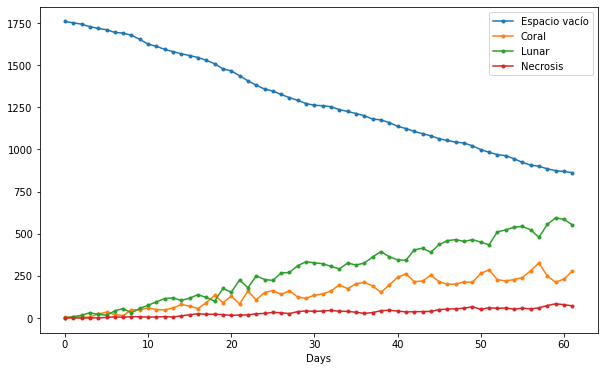

In [547]:
# exps = np.random.choice(susc.index, 2*len(infs), replace=True)
plt.figure(figsize=(10,6))
plt.plot(S, '.-', label="Espacio vacío")
plt.plot(E, '.-', label="Coral")
plt.plot(I, '.-', label="Lunar")
plt.plot(R, '.-', label="Necrosis")
plt.xlabel('Days')
plt.legend()
plt.show()

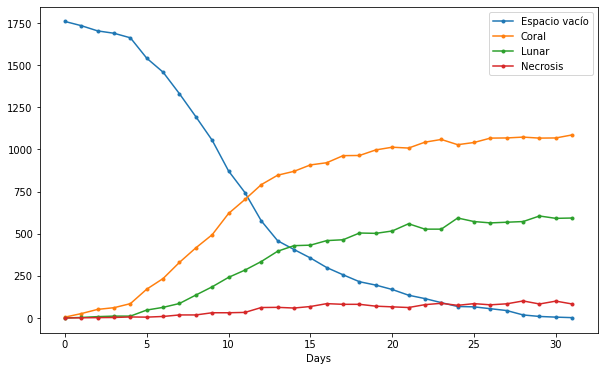

In [79]:
# exps = np.random.choice(susc.index, 2*len(infs), replace=True)
plt.figure(figsize=(10,6))
plt.plot(S, '.-', label="Espacio vacío")
plt.plot(E, '.-', label="Coral")
plt.plot(I, '.-', label="Lunar")
plt.plot(R, '.-', label="Necrosis")
plt.xlabel('Days')
plt.legend()
plt.show()

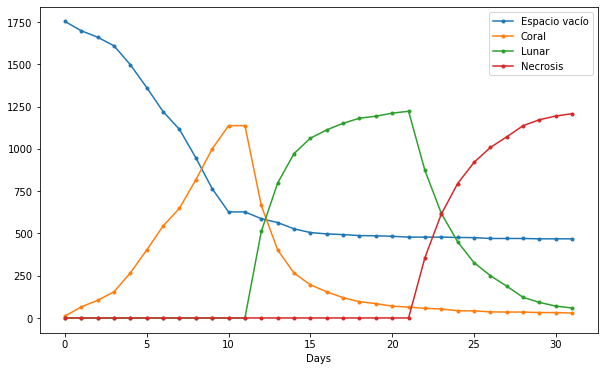

In [192]:
# exps = np.random.choice(susc.index, 2*len(infs), replace=True)
plt.figure(figsize=(10,6))
plt.plot(S, '.-', label="Espacio vacío")
plt.plot(E, '.-', label="Coral")
plt.plot(I, '.-', label="Lunar")
plt.plot(R, '.-', label="Necrosis")
plt.xlabel('Days')
plt.legend()
plt.show()

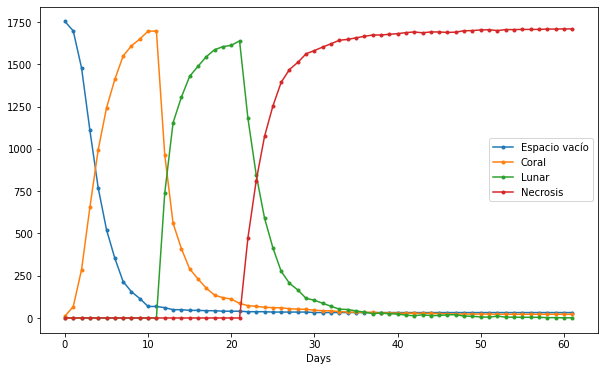

In [204]:
# exps = np.random.choice(susc.index, 2*len(infs), replace=True)
plt.figure(figsize=(10,6))
plt.plot(S, '.-', label="Espacio vacío")
plt.plot(E, '.-', label="Coral")
plt.plot(I, '.-', label="Lunar")
plt.plot(R, '.-', label="Necrosis")
plt.xlabel('Days')
plt.legend()
plt.show()